In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns

from PIL import Image
from os import listdir
from os.path import isfile, join
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from PIL import Image
import imutils
from tqdm import tqdm


4 type code start

In [ ]:
def crop_img(img):
    # Find the extreme points and take a reactangle out of them
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) # colored to grayscale image
    gray = cv2.GaussianBlur(gray, (3, 3), 0) # to reduce noise in the image

    # find contours in thresholded image, then grab the largest one
    thres = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thres = cv2.erode(thres, None, iterations=2)
    thres = cv2.dilate(thres, None, iterations=2)
    # we usually want the focused part to be white for it to be detected correctly
    # Image contouring is process of identifying structural outlines of objects for better detection
    cntrs = cv2.findContours(thres.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # image, contour retrieval method and contour approximation
    cntrs = imutils.grab_contours(cntrs) # actually obtain the contours
    c = max(cntrs, key=cv2.contourArea) # obtain the largest contour
    # threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise

    # Now that we have obtained the largest contour of an image, we must determine the extreme points
    # find the extreme points

    # find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    # adding the contour on image
    img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

    # adding the extreme points
    img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
    img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
    img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
    img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

    # crop
    ADD_PIXELS = 0
    new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
    return new_img

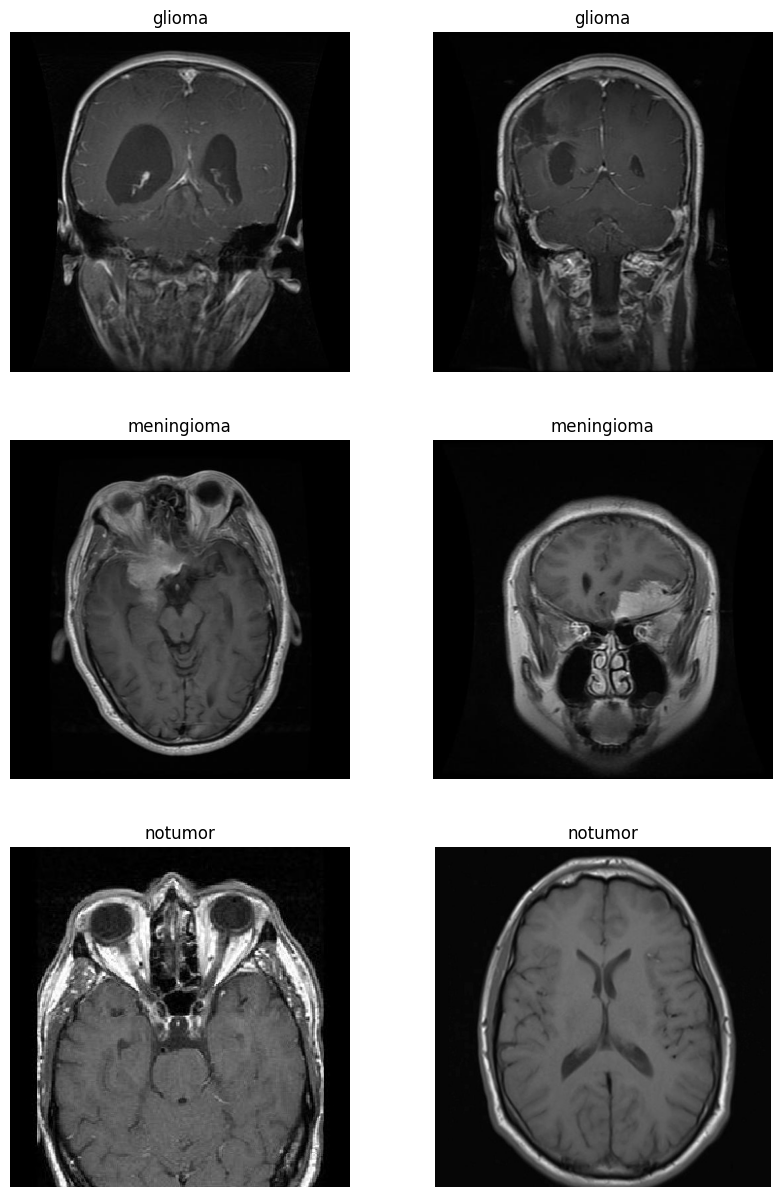

In [ ]:
dirs=('/content/drive/MyDrive/Training')
categories=['glioma','glioma', 'meningioma', 'meningioma','notumor','notumor']
plt.figure(figsize=(10,15))
img_path=['/glioma/Tr-gl_0015.jpg', '/glioma/Tr-gl_0010.jpg', '/meningioma/Tr-meTr_0005.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/notumor/Tr-noTr_0002.jpg']


for i in range(0, 6):
    ax=plt.subplot(3, 2, i + 1)
    img=cv2.imread(dirs + img_path[i])
    new_img=crop_img(img)
    plt.imshow(img)
    plt.axis('off')
    plt.title(categories[i])


In [ ]:
img = cv2.imread('/content/drive/MyDrive/Training/meningioma/Tr-meTr_0000.jpg')
img = cv2.resize(
            img,
            dsize=(224,224),
            interpolation=cv2.INTER_CUBIC
        )
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 8, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 8, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 8, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 8, (255, 255, 0), -1)

# crop
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

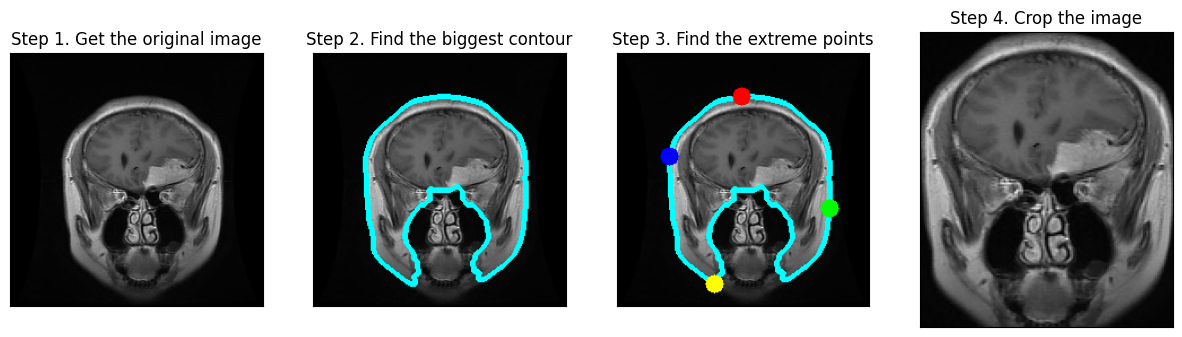

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()

In [ ]:
# RUN THIS SECTION OF CODE ONLY ONCE,BECAUSE HERE A NEW DATASET IS CREATED IN YOUR GOOGLE DRIVER SO ONCE YOU RUN THIS,IT IS CREATED  >>>>>>>

training='/content/drive/MyDrive/Training/'

training_dir=os.listdir(training)

img_size=200

for dir in training_dir:
    save_path=training + '/cropped/' + dir
    path=os.path.join(training, dir)
    image_dir=os.listdir(path)
    for img in image_dir:
        image=cv2.imread(os.path.join(path, img))
        new_img=crop_img(image)
        new_img=cv2.resize(new_img, (img_size, img_size))
        if not os.path.exists(save_path):
            os.makedirs(save_path)
        cv2.imwrite(save_path+'/'+img, new_img)


In [ ]:
labels = ['glioma', 'meningioma', 'notumor']

x = [] # training images.
y  = [] # training labels.

image_size = 150


for label in labels:
    trainPath = os.path.join('/content/drive/MyDrive/Training/cropped', label)
    for file in tqdm(os.listdir(trainPath)):
        image = cv2.imread(os.path.join(trainPath, file),0) # load images in gray.
        image = cv2.bilateralFilter(image, 2, 50, 50) # remove images noise.
        image = cv2.applyColorMap(image, cv2.COLORMAP_BONE) # produce a pseudocolored image.
        image = cv2.resize(image, (image_size, image_size)) # resize images into 150*150.
        x.append(image)
        y.append(labels.index(label))

100%|██████████| 1595/1595 [00:23<00:00, 68.20it/s] 


In [ ]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, shuffle = True)

l = len(x_test)//2
x_valid, y_valid = x_test[:l], y_test[:l]
x_test, y_test = x_test[l:], y_test[l:]

In [ ]:
x_train=np.array(x_train)
x_train = (x_train.astype('float32') )/ 255
x_test=np.array(x_test)
x_test = (x_test.astype('float32') )/ 255
x_valid=np.array(x_valid)
x_valid = (x_valid.astype('float32') )/ 255

y_train = np.array(y_train)
y_test = np.array(y_test)
y_valid = np.array(y_valid)
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(3404, 150, 150, 3)
(426, 150, 150, 3)
(425, 150, 150, 3)


In [ ]:
print(x_train.shape)
print(x_train[1][1])
print(type(x_train[1]))
print(y_train.shape)

(3404, 150, 150, 3)
[[0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.    

In [ ]:
vgg16 = VGG16(input_shape=[150,150] + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# Freeze four convolution blocks
for layer in model.layers[:15]:
    layer.trainable = False
# Make sure you have frozen the correct layers
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 input_1 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool False
7 block3_conv1 False
8 block3_conv2 False
9 block3_conv3 False
10 block3_pool False
11 block4_conv1 False
12 block4_conv2 False
13 block4_conv3 False
14 block4_pool False
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True
19 flatten True
20 dense True


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
history=model.fit(x=x_train, y=y_train, validation_data=(x_valid, y_valid),epochs = 100)

Epoch 1/100
107/107 [==============================] - 24s 107ms/step - loss: 0.9286 - accuracy: 0.5344 - val_loss: 0.6010 - val_accuracy: 0.7553
Epoch 2/100
107/107 [==============================] - 9s 85ms/step - loss: 0.4548 - accuracy: 0.8143 - val_loss: 0.3971 - val_accuracy: 0.8165
Epoch 3/100
107/107 [==============================] - 9s 89ms/step - loss: 0.3182 - accuracy: 0.8825 - val_loss: 0.2663 - val_accuracy: 0.8824
Epoch 4/100
107/107 [==============================] - 9s 85ms/step - loss: 0.2551 - accuracy: 0.9007 - val_loss: 0.2390 - val_accuracy: 0.9106
Epoch 5/100
107/107 [==============================] - 9s 87ms/step - loss: 0.1841 - accuracy: 0.9374 - val_loss: 0.3964 - val_accuracy: 0.8494
Epoch 6/100
107/107 [==============================] - 10s 91ms/step - loss: 0.1229 - accuracy: 0.9580 - val_loss: 0.2188 - val_accuracy: 0.9224
Epoch 7/100
107/107 [==============================] - 10s 91ms/step - loss: 0.0889 - accuracy: 0.9692 - val_loss: 0.2291 - val_accur

In [ ]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

# 0: test loss, 1: test accuracy


 Test accuracy: 0.9366196990013123


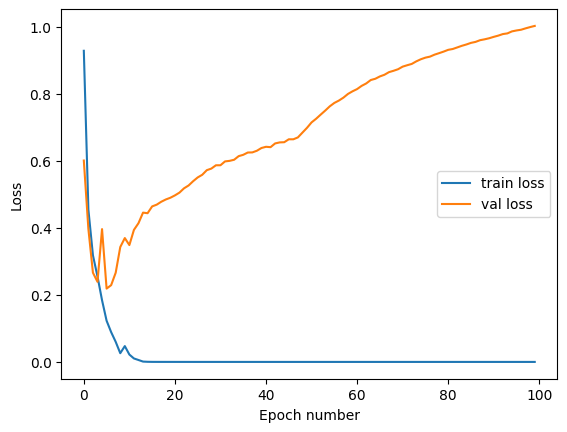

In [ ]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel('Epoch number')
plt.ylabel('Loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()

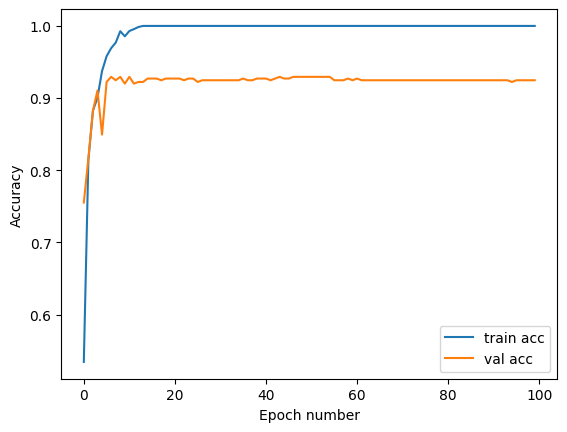

In [ ]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch number')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

14/14 [==============================] - 1s 67ms/step
                       precision    recall  f1-score   support

    giloma (Class 0 )       0.93      0.91      0.92       140
muningioma (Classs 1)       0.90      0.93      0.91       135
   no tumor (class 1)       0.97      0.97      0.97       151

             accuracy                           0.94       426
            macro avg       0.94      0.94      0.94       426
         weighted avg       0.94      0.94      0.94       426



Text(50.722222222222214, 0.5, 'Actual values')

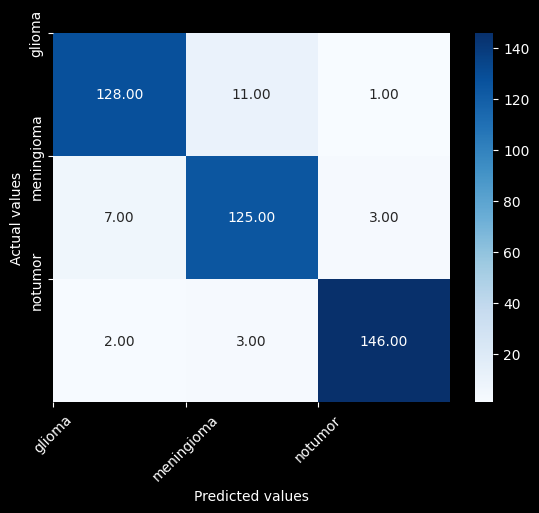

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns
#predict
y_pred=model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)

#get classification repor
print(classification_report(y_pred,y_test,target_names=['giloma (Class 0 )','muningioma (Classs 1)','no tumor (class 1)']))
with plt.style.context('dark_background'):
    cm=confusion_matrix(y_pred,y_test)
    sns.heatmap(cm,annot=True,cmap=plt.cm.Blues,fmt='.2f',)
    tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')




End of testing


In [ ]:
cm = confusion_matrix(y_pred,y_test)
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = np.sum(cm) - (FP + FN + TP)
print(FP,FN,TP,TN)

[ 9 14  4] [12 10  5] [128 125 146] [277 277 271]


In [ ]:
Pyes = ((TP+TN)/(TP+FN+FP+TN))*((TP+FN)/(TP+FN+FP+TN))
print(Pyes)

[0.31243801 0.29904781 0.3469715 ]


In [ ]:
Pno = ((FP+TN)/(TP+FN+FP+TN))*((TN+FN)/(TP+FN+FP+TN))
print(Pno)

[0.45545416 0.46020961 0.41823712]


In [ ]:
print(Pyes+Pno)

[0.76789217 0.75925742 0.76520862]


In [ ]:
A = (TP+TN)/(TP+FP+FN+TN)
print(A)

[0.95070423 0.94366197 0.97887324]
